## Employee Retention Using Machine Learning  

### Exploratory Data Analysis 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [8]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
empid,14999.0,7500.000000,4329.982679,1.00,3750.50,7500.00,11249.50,14999.0
satisfaction_level,14997.0,0.612863,0.248634,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


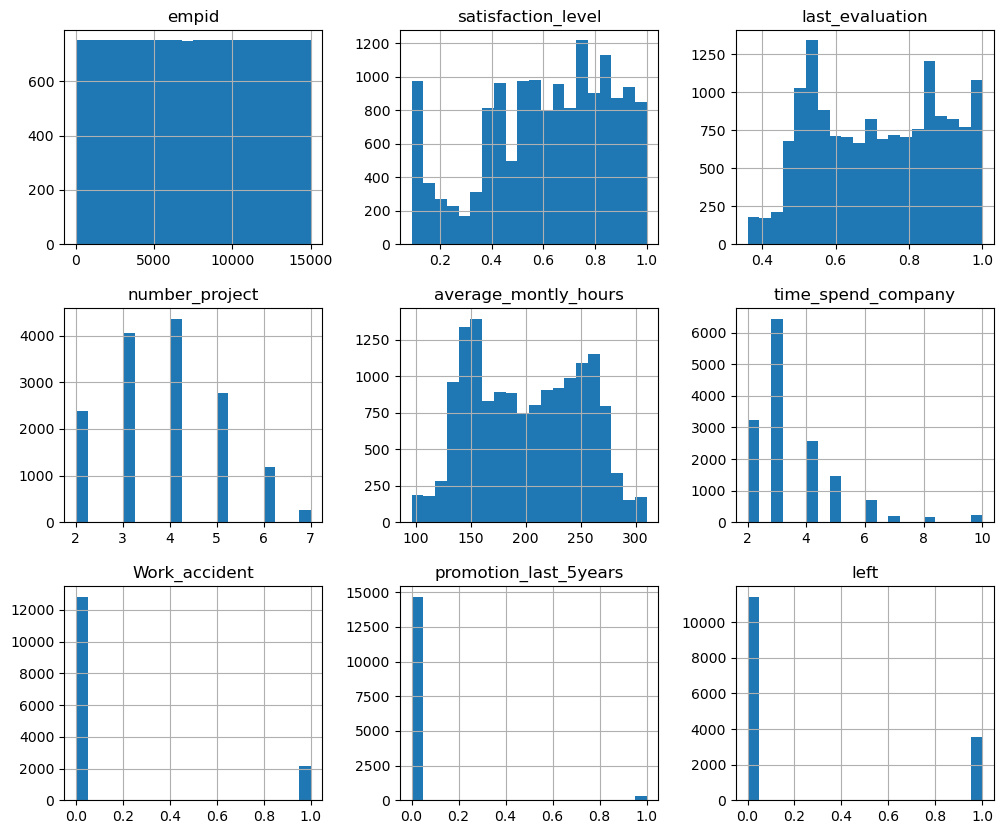

In [10]:
# Histogram of key features
df.hist(bins=20, figsize=(12, 10))
plt.show()

#### Correlation Analysis

* Compute and visualize the correlation between features and the target variable (left) and between different features.
* This helps identify strong relationships.

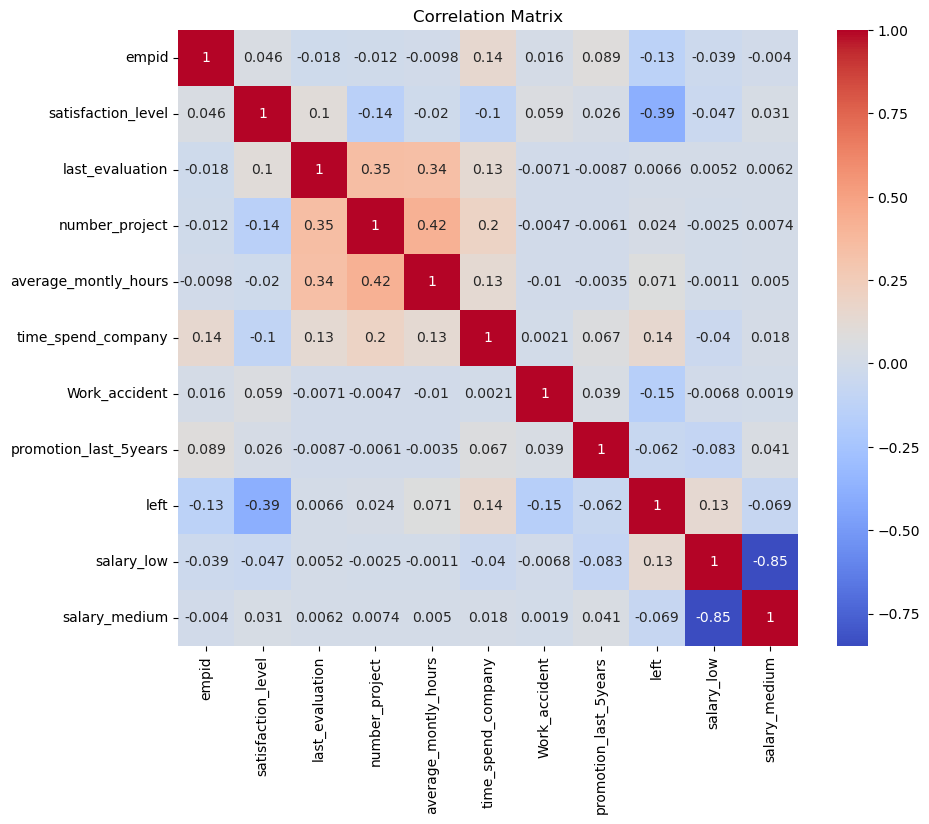

In [12]:
# Convert the 'salary' column to one-hot encoding
df = pd.get_dummies(df, columns=['salary'], drop_first=True)

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Distribution of Features by Target Variable

*  Visualize how the features are distributed based on whether employees left or stayed. This can help identify patterns.

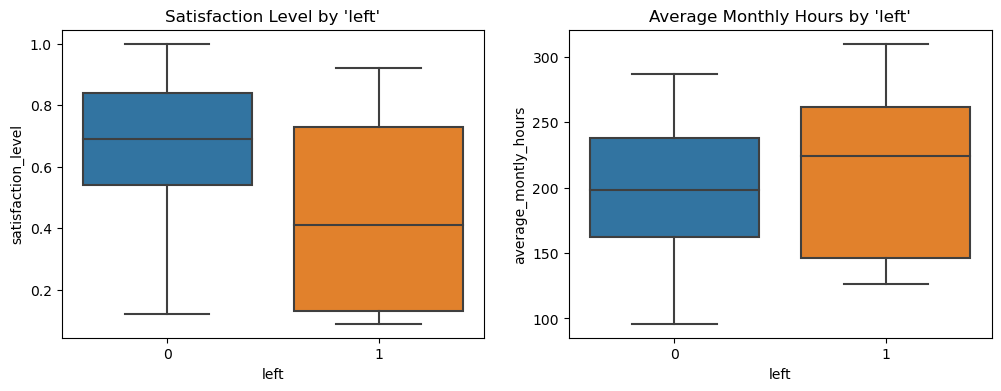

In [14]:
# Feature distribution by 'left' (e.g., 'satisfaction_level')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction Level by 'left'")

plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title("Average Monthly Hours by 'left'")
plt.show()


#### Employee Satisfaction Analysis

* Analyze employee satisfaction scores to understand how they relate to retention.

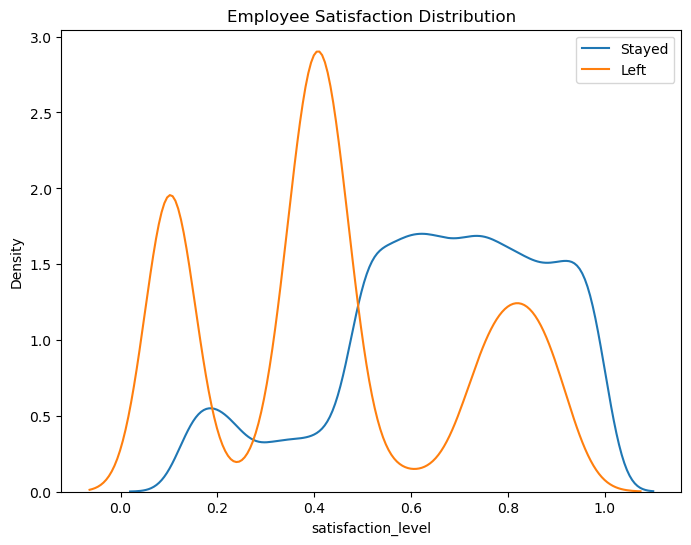

In [16]:
# Employee satisfaction distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], label='Stayed')
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], label='Left')
plt.title('Employee Satisfaction Distribution')
plt.legend()
plt.show()


#### Tenure Analysis 

* Analyze how tenure (time spent at the company) is distributed and its relation to retention.
  

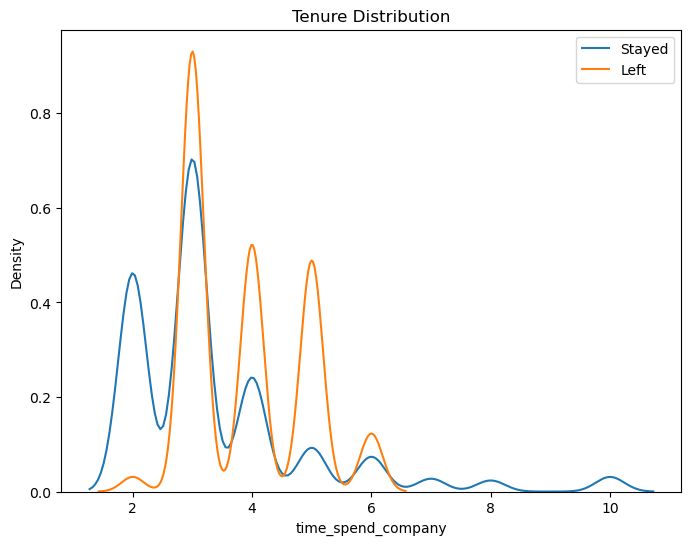

In [17]:
# Tenure distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['left'] == 0]['time_spend_company'], label='Stayed')
sns.kdeplot(df[df['left'] == 1]['time_spend_company'], label='Left')
plt.title('Tenure Distribution')
plt.legend()
plt.show()


#### Count plot of 'Work_accident' by 'left'

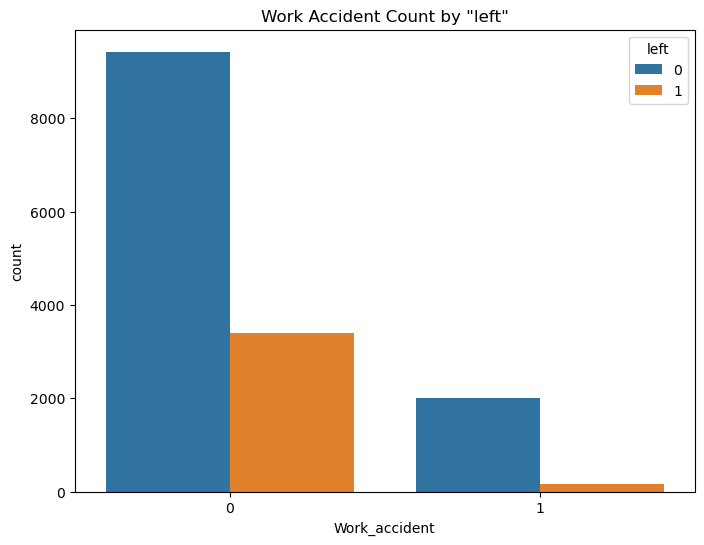

In [19]:
# Countplot of 'Work_accident' by 'left'
plt.figure(figsize=(8, 6))
sns.countplot(x='Work_accident', hue='left', data=df)
plt.title('Work Accident Count by "left"')
plt.show()

#### ountplot of 'promotion_last_5years' by 'left'

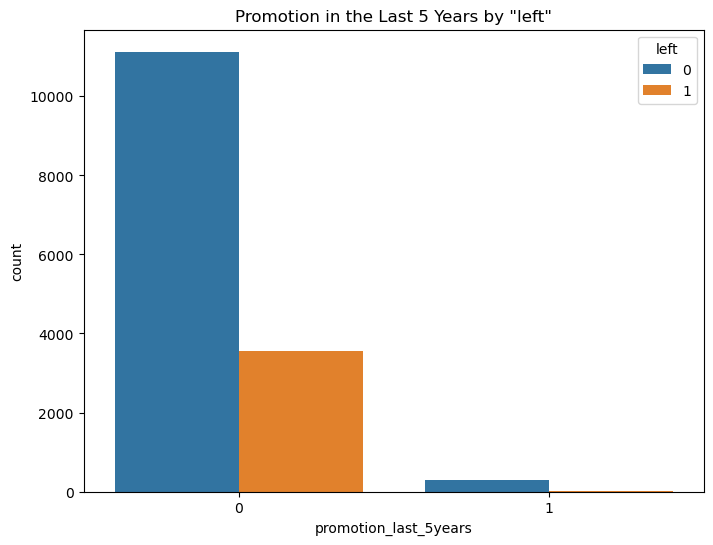

In [20]:
# Countplot of 'promotion_last_5years' by 'left'
plt.figure(figsize=(8, 6))
sns.countplot(x='promotion_last_5years', hue='left', data=df)
plt.title('Promotion in the Last 5 Years by "left"')
plt.show()

#### Salary Analysis

*  Analyze how salary levels are distributed and their impact on employee retention.

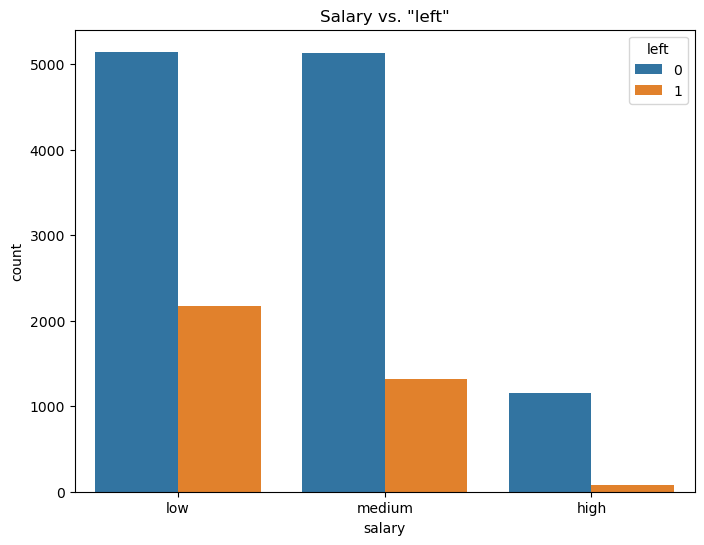

In [44]:
# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='salary',data=df,hue='left')
plt.title('Salary vs. "left"')
plt.show()

#### Satisfaction Level 

* Plot a univariate distribution of observations 

C:\Users\Firas\AppData\Local\Temp\ipykernel_14452\1256947740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfaction_level'])


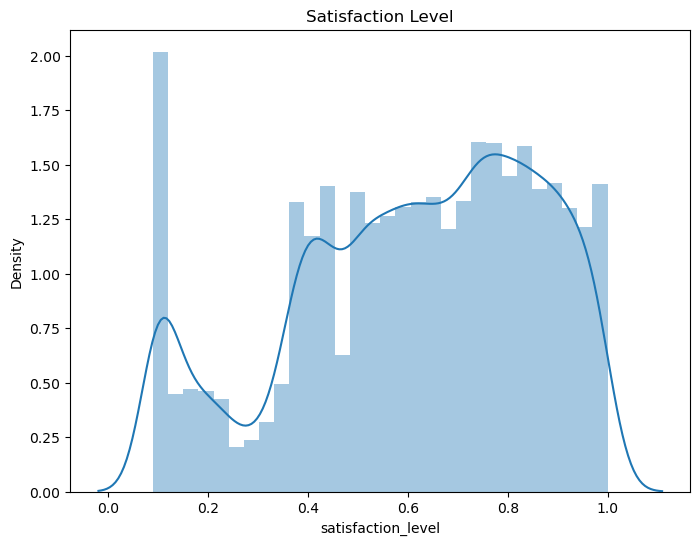

In [47]:
plt.figure(figsize=(8, 6))
sns.distplot(df['satisfaction_level'])
plt.title('Satisfaction Level')
plt.show()

* Plot a box plot to showcase the distribution of satisfaction level vs 'left' 

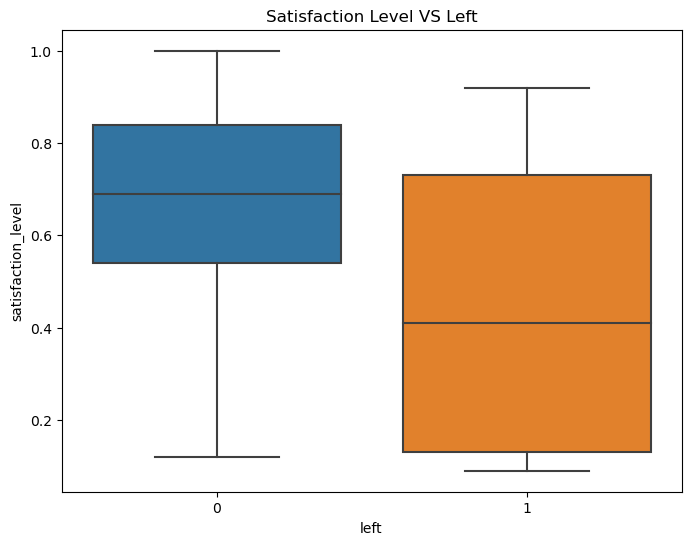

In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='left',y='satisfaction_level',data=df)
plt.title('Satisfaction Level VS Left')
plt.show()

#### Number of project 

* Plot a univariate distribution of observations

C:\Users\Firas\AppData\Local\Temp\ipykernel_14452\3314716528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['number_project'])


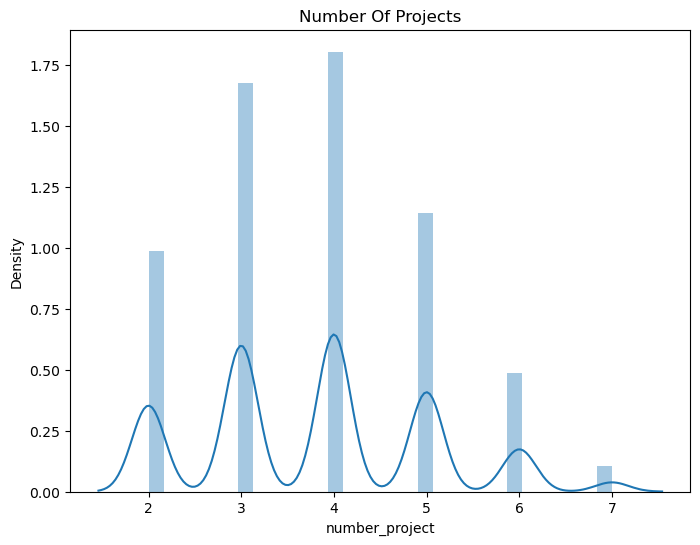

In [54]:
plt.figure(figsize=(8, 6))
sns.distplot(df['number_project'])
plt.title('Number Of Projects')
plt.show()

* Plot a box plot to showcase the distribution of number of projects vs 'left'

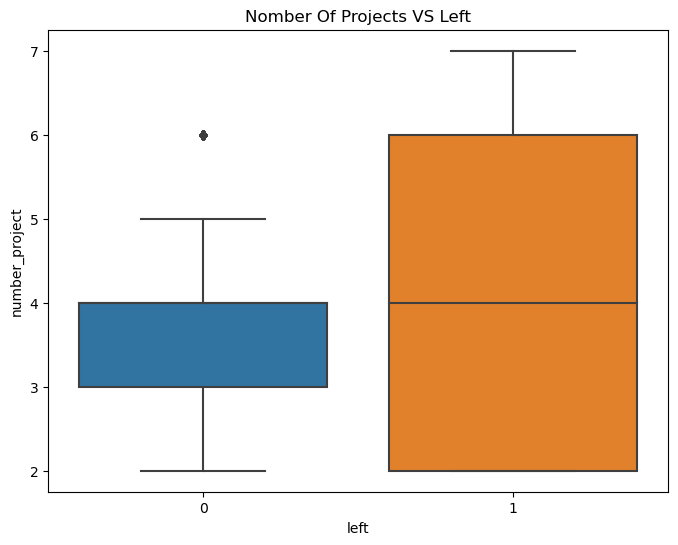

In [55]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='left',y='number_project',data=df)
plt.title('Nomber Of Projects VS Left')
plt.show()

#### Last Evaluation 

* plot a univariate distribution of observations

C:\Users\Firas\AppData\Local\Temp\ipykernel_14452\2340354332.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['last_evaluation'])


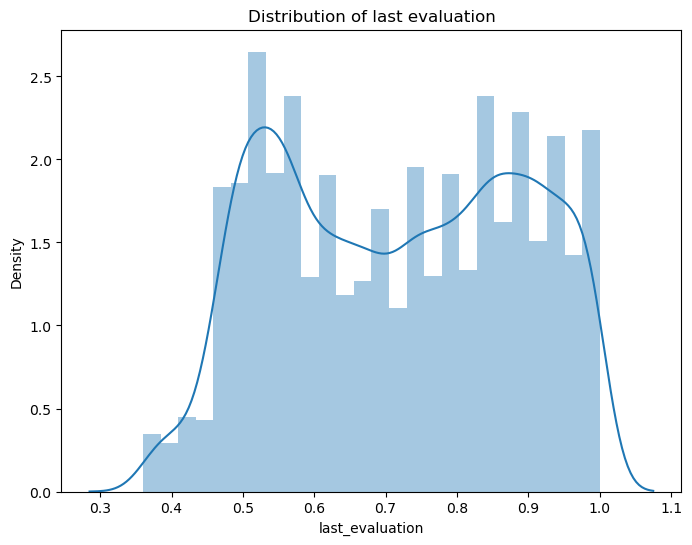

In [57]:
plt.figure(figsize=(8, 6))
sns.distplot(df['last_evaluation'])
plt.title('Distribution of last evaluation')
plt.show()

* Plot a box plot to showcase the distribution of Last evaluation vs 'left'

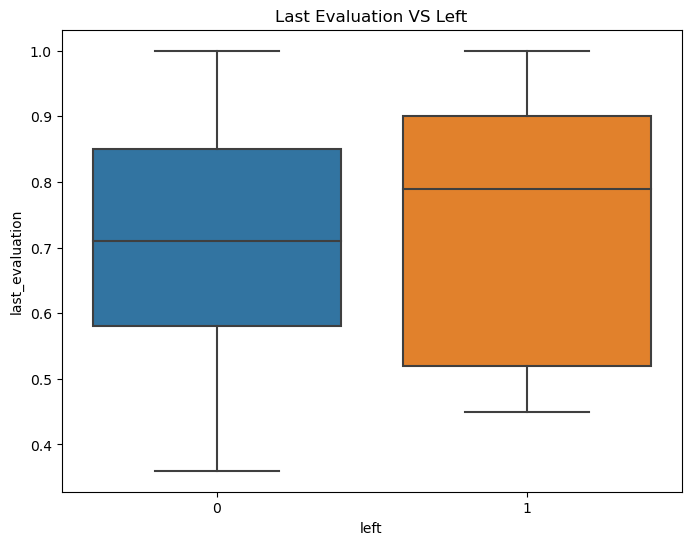

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='last_evaluation',x='left',data=df)
plt.title('Last Evaluation VS Left')
plt.show()

#### Monthly Hours 

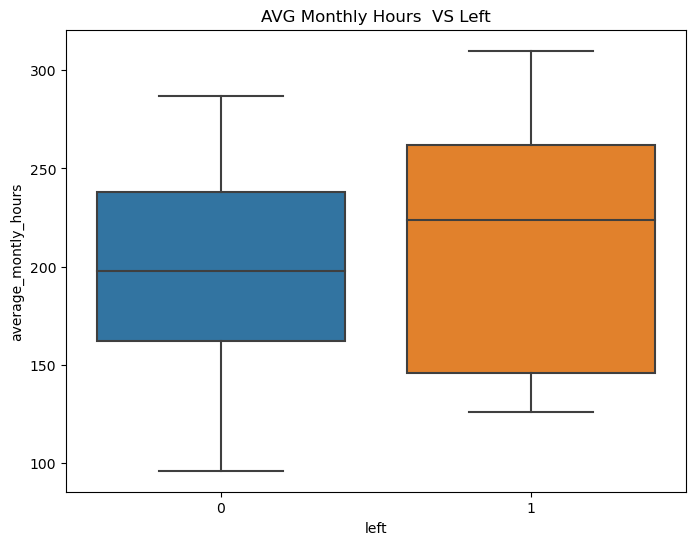

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='average_montly_hours',x='left',data=df)
plt.title('AVG Monthly Hours  VS Left')
plt.show()